In [1]:
# %load api_keys.py


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



608

In [4]:
#Make API call and limit API call 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

#Set values
cit_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Set Counter
record = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cit_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record}")
                
        record = record + 1
        
              
        #Set time loop
        time.sleep(1.0)
    
    except:
        print("City not found.  Skipping...")
    
    continue


Processing Record 1
Processing Record 2
Processing Record 3
Processing Record 4
Processing Record 5
Processing Record 6
Processing Record 7
Processing Record 8
Processing Record 9
Processing Record 10
Processing Record 11
Processing Record 12
Processing Record 13
City not found.  Skipping...
Processing Record 14
Processing Record 15
Processing Record 16
Processing Record 17
Processing Record 18
Processing Record 19
Processing Record 20
Processing Record 21
Processing Record 22
Processing Record 23
Processing Record 24
Processing Record 25
Processing Record 26
Processing Record 27
Processing Record 28
City not found.  Skipping...
Processing Record 29
Processing Record 30
Processing Record 31
Processing Record 32
Processing Record 33
Processing Record 34
Processing Record 35
Processing Record 36
Processing Record 37
Processing Record 38
Processing Record 39
City not found.  Skipping...
Processing Record 40
Processing Record 41
Processing Record 42
City not found.  Skipping...
Processing 

City not found.  Skipping...
Processing Record 330
Processing Record 331
Processing Record 332
Processing Record 333
Processing Record 334
Processing Record 335
Processing Record 336
City not found.  Skipping...
Processing Record 337
Processing Record 338
Processing Record 339
Processing Record 340
Processing Record 341
Processing Record 342
Processing Record 343
Processing Record 344
Processing Record 345
Processing Record 346
Processing Record 347
Processing Record 348
Processing Record 349
Processing Record 350
Processing Record 351
Processing Record 352
Processing Record 353
Processing Record 354
Processing Record 355
Processing Record 356
Processing Record 357
Processing Record 358
City not found.  Skipping...
Processing Record 359
Processing Record 360
Processing Record 361
Processing Record 362
Processing Record 363
City not found.  Skipping...
Processing Record 364
Processing Record 365
Processing Record 366
Processing Record 367
Processing Record 368
Processing Record 369
City

In [5]:
#Create a dictionary
weather_dict = {
    "City Name":cit_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

#Save to a dataframe
weather_df = pd.DataFrame(weather_dict)

weather_df.count()

City Name     550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [6]:
weather_df.head()

#Save to a csv file
weather_df.to_csv("WeatherPy.csv", encoding="utf-8", index=False)

## Latitude vs. Temperature Plot

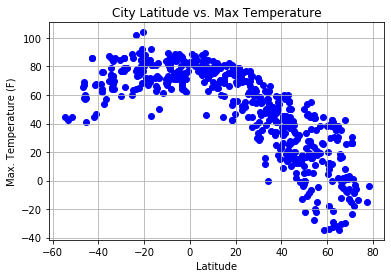

In [7]:
#Generate plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o",color = "blue")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("../GRADE_THIS/lat_v_temp.png")

# Show the Figure
plt.show()


## Latitude vs. Humidity Plot

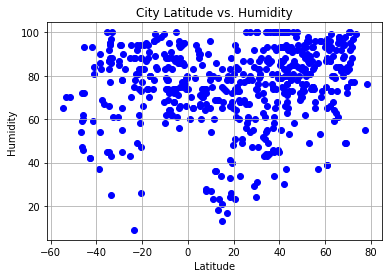

In [11]:
#Generate plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o",color = "blue")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("../GRADE_THIS/lat_v_humidity.png")

# Show the Figure
plt.show()


## Latitude vs. Cloudiness Plot

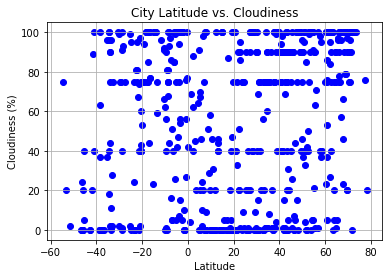

In [12]:
#Generate the plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o",color = "blue")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("../GRADE_THIS/lat_v_cloud.png")

# Show the Figure
plt.show()

## Latitude vs. Windspeed Plot

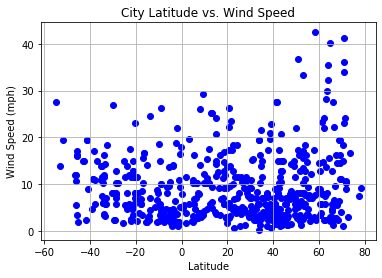

In [13]:
#Generate plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o",color = "blue")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("../GRADE_THIS/lat_v_wind.png")

# Show the Figure
plt.show()

## Analysis
When you compare the temperature and the latitude.  Temperatures are similar around the equator as well if you go up or down from it.  However, the farther up the equator the colder the temperature.

The majority of the cities have high humidity.  But there is little correlation between where a city is located and humidity. 

The same is true for windspeed.  Although the majority of cities have low wind speeds, there is little correlation.

With regards to cloudiness, there was no real correlation with where the city was located.

